In [171]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [172]:
GHSV = 120000 # mL/g/h
wcat = 0.62 # g
L = 2 # cm
ID = 0.6 # cm
A = np.pi*ID**2 /4 # cm2
Vcat = A * L # mL
rho_cat= wcat/Vcat # g/mL
rho_cat


1.0964007190775011

In [173]:
Fvi = GHSV * wcat / 3600 # mL/s
Fi = Fvi/1000*1/0.082057/273.15 # mol/s
zCO2 = 0.25
zH2 = 0.75
FCO2i = Fi * zCO2
FH2i = Fi * zH2
FCO2i, FH2i

(0.00023051203430719827, 0.0006915361029215948)

In [174]:
Fvi*zCO2

5.166666666666667

In [175]:
df_exp = pd.read_csv('RWGS_kinetic_data_NiCe.csv')
df_exp['Fi_CO2'] = FCO2i; df_exp['Fi_H2'] = FH2i
df_exp['S_CO'] = df_exp['CO']/(df_exp['CO']+df_exp['CH4'])*100; df_exp['S_CH4'] = df_exp['CH4']/(df_exp['CO']+df_exp['CH4'])*100
df_exp['Ai_C'] = df_exp['Fi_CO2']; df_exp['Ai_H'] = df_exp['Fi_H2']*2; df_exp['Ai_O'] = df_exp['Fi_CO2']*2
df_exp['F_CO2'] = df_exp['Fi_CO2']*(1-df_exp['X']/100)
df_exp['F_CO'] = df_exp['Fi_CO2']*df_exp['X']/100*df_exp['S_CO']/100
df_exp['F_CH4'] = df_exp['Fi_CO2']*df_exp['X']/100*df_exp['S_CH4']/100
df_exp['F_H2O'] = df_exp['F_CO'] + df_exp['F_CH4']*2
df_exp['F_H2'] = df_exp['Fi_H2'] - df_exp['F_CO'] - df_exp['F_CH4']*4
df_exp['A_C'] = df_exp['F_CO2'] + df_exp['F_CO'] + df_exp['F_CH4']
df_exp['A_H'] = df_exp['F_H2O']*2 + df_exp['F_H2']*2 + df_exp['F_CH4']*4
df_exp['Fi_sum'] = df_exp['Fi_CO2'] + df_exp['Fi_H2']
df_exp['F_sum'] = df_exp['F_CO2'] + df_exp['F_CO'] + df_exp['F_CH4'] + df_exp['F_H2O'] + df_exp['F_H2']
df_exp

,cat no,cat,Temp,X,CO,CH4,Fi_CO2,Fi_H2,S_CO,S_CH4,...,Ai_O,F_CO2,F_CO,F_CH4,F_H2O,F_H2,A_C,A_H,Fi_sum,F_sum
0,1,12Ni|HSA-Al2O3 (SIM),880.5667,81.8,96.8,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000042,0.000189,0.000000,0.000189,0.000503,0.000231,0.001383,0.000922,0.000922
1,1,12Ni|HSA-Al2O3 (SIM),787.4667,78.8,96.9,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000049,0.000182,0.000000,0.000182,0.000510,0.000231,0.001383,0.000922,0.000922
2,1,12Ni|HSA-Al2O3 (SIM),689.4333,74.5,96.6,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000059,0.000172,0.000000,0.000172,0.000520,0.000231,0.001383,0.000922,0.000922
3,1,12Ni|HSA-Al2O3 (SIM),590.9000,67.9,92.6,4.5,0.000231,0.000692,95.365602,4.634398,...,0.000461,0.000074,0.000149,0.000007,0.000164,0.000513,0.000231,0.001383,0.000922,0.000908
4,1,12Ni|HSA-Al2O3 (SIM),485.0333,57.6,73.9,24.5,0.000231,0.000692,75.101626,24.898374,...,0.000461,0.000098,0.000100,0.000033,0.000166,0.000460,0.000231,0.001383,0.000922,0.000856
5,1,12Ni|HSA-Al2O3 (SIM),368.4667,39.2,84.8,13.7,0.000231,0.000692,86.091371,13.908629,...,0.000461,0.000140,0.000078,0.000013,0.000103,0.000563,0.000231,0.001383,0.000922,0.000897
6,2,12Ni2Ce|HSA-Al2O3 (SIM),878.1000,81.7,96.9,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000042,0.000188,0.000000,0.000188,0.000503,0.000231,0.001383,0.000922,0.000922
7,2,12Ni2Ce|HSA-Al2O3 (SIM),783.2667,78.6,96.9,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000049,0.000181,0.000000,0.000181,0.000510,0.000231,0.001383,0.000922,0.000922
8,2,12Ni2Ce|HSA-Al2O3 (SIM),681.2000,74.2,96.5,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000059,0.000171,0.000000,0.000171,0.000520,0.000231,0.001383,0.000922,0.000922
9,2,12Ni2Ce|HSA-Al2O3 (SIM),583.9000,67.6,91.9,5.1,0.000231,0.000692,94.742268,5.257732,...,0.000461,0.000075,0.000148,0.000008,0.000164,0.000511,0.000231,0.001383,0.000922,0.000906


In [176]:
df_1 = pd.DataFrame()
i = 2
df_1['T'] = df_exp[df_exp['cat no'] == i]['Temp']
df_1['Fi_CO2'] = df_exp[df_exp['cat no'] == i]['Fi_CO2']
df_1['Fi_H2'] = df_exp[df_exp['cat no'] == i]['Fi_H2']
df_1['F_CO2'] = df_exp[df_exp['cat no'] == i]['F_CO2']
df_1['F_CO'] = df_exp[df_exp['cat no'] == i]['F_CO']
df_1['F_CH4'] = df_exp[df_exp['cat no'] == i]['F_CH4']
df_1['F_H2O'] = df_exp[df_exp['cat no'] == i]['F_H2O']
df_1['F_H2'] = df_exp[df_exp['cat no'] == i]['F_H2']
df_1['Fi_sum'] = df_exp[df_exp['cat no'] == i]['Fi_sum']
df_1['F_sum'] = df_exp[df_exp['cat no'] == i]['F_sum']
df_1['VFi'] = df_1['Fi_sum']*0.082057*(df_1['T']+273.15)
df_1['VF'] = df_1['F_sum']*0.082057*(df_1['T']+273.15)
df_1['resi'] = df_1['VFi']/Vcat
df_1['res'] = df_1['VF']/Vcat
df_1['rt'] = (df_1['resi'] + df_1['res'])/2
df_1

,T,Fi_CO2,Fi_H2,F_CO2,F_CO,F_CH4,F_H2O,F_H2,Fi_sum,F_sum,VFi,VF,resi,res,rt
6,878.1000,0.000231,0.000692,0.000042,0.000188,0.000000,0.000188,0.000503,0.000922,0.000922,0.087104,0.087104,0.154034,0.154034,0.154034
7,783.2667,0.000231,0.000692,0.000049,0.000181,0.000000,0.000181,0.000510,0.000922,0.000922,0.079929,0.079929,0.141346,0.141346,0.141346
8,681.2000,0.000231,0.000692,0.000059,0.000171,0.000000,0.000171,0.000520,0.000922,0.000922,0.072207,0.072207,0.127689,0.127689,0.127689
9,583.9000,0.000231,0.000692,0.000075,0.000148,0.000008,0.000164,0.000511,0.000922,0.000906,0.064845,0.063692,0.114671,0.112633,0.113652
10,485.3333,0.000231,0.000692,0.000098,0.000090,0.000043,0.000175,0.000431,0.000922,0.000837,0.057387,0.052069,0.101483,0.092079,0.096781
11,369.4333,0.000231,0.000692,0.000128,0.000070,0.000033,0.000135,0.000492,0.000922,0.000857,0.048618,0.045181,0.085976,0.079898,0.082937


In [177]:
def ode(t, N, T, k):
    pP = N/sum(N)*1.01325
    # 0 CO2, 1 H2, 2 CO, 3 CH4, 4 H2O

    TK = T +273.15

    kMTN = k[0]*np.exp(-k[4]/(0.008314*TK))
    kRWGS = k[1]*np.exp(-k[5]/(0.008314*TK))
    kDRM = k[2]*np.exp(-k[6]/(0.008314*TK))
    kOTN = k[3]*np.exp(-k[7]/(0.008314*TK))

    KCO = k[8]*np.exp(k[13]/(0.008314*TK))
    KH2O = k[9]*np.exp(k[14]/(0.008314*TK))
    KCO2 = k[10]*np.exp(k[15]/(0.008314*TK))
    KH2 = k[11]*np.exp(k[16]/(0.008314*TK))
    KCH4 = k[12]*np.exp(k[17]/(0.008314*TK))

    #KDRM = k[16]*np.exp(-k[17]/(TK))

    den = 1 + KCO2*pP[0] + KH2*pP[1] + KH2O*pP[4] + KCO*pP[2]

    Keq_MTN = np.exp(29.72969 + 0.002703*TK + 17791.69/TK - 7.7973*np.log(TK))
    Keq_RWGS = np.exp(13.64981 + 2.80537e-5*TK - 5214.4/TK - 1.2507* np.log(TK))
    Keq_DRM = np.exp(-2.43006 - 0.00265*TK -28616.5/TK + 5.295903*np.log(TK))
    Keq_OTN = np.exp(16.07987 + 0.002675*TK +23204.1/TK - 6.0746*np.log(TK))

    rMTN = 0.02*kMTN*KH2*KCO2*pP[1]*(1 - pP[3]*pP[4]**2/pP[1]**4/pP[0]/Keq_MTN)/den**2
    rRWGS = 0.02*kRWGS*KCO2*pP[0]*(1 - pP[2]*pP[4]/pP[1]/pP[0]/Keq_RWGS)/den
    rDRM = kDRM*(pP[3]*pP[0] - pP[1]**2*pP[2]**2/Keq_DRM) / (1 + KCH4*pP[3] + KCO*pP[2]) / (1 + KCO2*pP[0])
    rOTN = 0.02*kOTN*KH2*KCO*pP[1]*pP[2]*(1 - pP[3]*pP[4]/pP[1]**3/pP[2]/Keq_OTN)/den**2

    dN0dt = -rMTN - rRWGS - rDRM
    dN1dt = -4*rMTN - rRWGS + 2*rDRM - 3*rOTN
    dN2dt = rRWGS + 2*rDRM - rOTN
    dN3dt = rMTN - rDRM + rOTN
    dN4dt = 2*rMTN + rRWGS + rOTN

    return np.array([dN0dt, dN1dt, dN2dt, dN3dt, dN4dt])


In [178]:
def solve_ode(k, df):
    tend = df['rt']
    N0 = [df['Fi_CO2'],df['Fi_H2'],1e-10,1e-10,1e-10]
    T = df['T']
    sol = solve_ivp(
        ode,
        t_span = (0,tend),
        y0 = N0,
        args = (T, k,),
        method = 'BDF'  )
    return sol.y

In [179]:
def obj(x):
    k0 = np.array([1.14e8/60, 1.78e6/60, 2.91e3/60, 2.23e8/60, 110, 97.1, 91.03, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 6.65e-4 ,40.6, 14.5, 9.72, 52,38.28])
    k = 10**x*k0
    err = 0
    for i in range(len(df_1)):
        N_pred = solve_ode(k, df_1.iloc[i])[:,-1]
        N_exp = df_1.iloc[i][['F_CO2','F_H2','F_CO','F_CH4','F_H2O']].values
        err += np.sum((N_pred - N_exp)**2)*1e6
    #print(err)
    return err

In [180]:
k0 = np.array([1.14e8/60, 1.78e6/60, 2.91e9/60, 2.23e8/60, 110, 97.1, 91.03, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 6.65e-4 ,40.6, 14.5, 9.72, 52,38.28])
# 0 k0MTN, 1 k0RWGS, 2 k0DRM, 3 k0OTN, 4 EaMTN, 5 EaRWGS, 6 EaDRM, 7 EaOTN, 8 K0CO, 9 K0H2O, 10 K0CO2, 11 K0H2, 12K0CH4, 13 QCO, 14 QH2O, 15 QCO2, 16 QH2, 17 QCH40
best_loss = float('inf')
best_x = np.array([ 0.00637388,  0.00712435,  0.00394179, -0.00010259, -0.06296375,
        0.00791198, -0.00763004,  0.02866411, -0.00419692,  0.00212136,
        0.00385168, -0.00310449, -0.0020856 ,  0.02204777, -0.01328846,
        0.00019008,  0.01005689,  0.00572927])
x0 = best_x
# result = minimize(
#     obj,
#     x0=x0,
#     method='Nelder-Mead',
# )
for i in range(300):  # 10번 반복
    result = minimize(
        obj,
        x0=x0,
        method='Nelder-Mead',
    )
    
    # 현재 시도의 loss 출력
    print(f'시도 {i+1} - Loss: {result.fun:.6f}, Best Loss: {best_loss:.6f}')
    
    if result.fun < best_loss:
        best_loss = result.fun
        best_x = result.x.copy()
        x0 = result.x.copy()  # 더 나은 결과를 얻은 경우 x0를 result.x로 갱신
    else:
        x0 = best_x.copy()  # 더 나은 결과를 얻지 못한 경우 best_x를 x0로 사용
        
    # x0에 랜덤 변화 추가
    x0 = x0 * (1 + np.random.randn(len(x0)) * 0.3)




시도 1 - Loss: 0.009884, Best Loss: inf
시도 2 - Loss: 0.010141, Best Loss: 0.009884


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 3 - Loss: 0.009749, Best Loss: 0.009884


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 4 - Loss: 0.009760, Best Loss: 0.009749


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 5 - Loss: 0.009782, Best Loss: 0.009749


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 6 - Loss: 0.009938, Best Loss: 0.009749


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 7 - Loss: 0.009686, Best Loss: 0.009749


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 8 - Loss: 0.008694, Best Loss: 0.009686


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 9 - Loss: 0.010006, Best Loss: 0.008694


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 10 - Loss: 0.008512, Best Loss: 0.008694
시도 11 - Loss: 0.005986, Best Loss: 0.008512
시도 12 - Loss: 0.005807, Best Loss: 0.005986
시도 13 - Loss: 0.005662, Best Loss: 0.005807
시도 14 - Loss: 0.005670, Best Loss: 0.005662
시도 15 - Loss: 0.008233, Best Loss: 0.005662
시도 16 - Loss: 0.003334, Best Loss: 0.005662
시도 17 - Loss: 0.046233, Best Loss: 0.003334


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 18 - Loss: 0.003440, Best Loss: 0.003334
시도 19 - Loss: 0.003345, Best Loss: 0.003334


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 20 - Loss: 0.007889, Best Loss: 0.003334
시도 21 - Loss: 0.003364, Best Loss: 0.003334
시도 22 - Loss: 0.020355, Best Loss: 0.003334
시도 23 - Loss: 0.003341, Best Loss: 0.003334


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 24 - Loss: 0.003480, Best Loss: 0.003334


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)


시도 25 - Loss: 0.010313, Best Loss: 0.003334
시도 26 - Loss: 0.003328, Best Loss: 0.003334
시도 27 - Loss: 0.004787, Best Loss: 0.003328
시도 28 - Loss: 0.003356, Best Loss: 0.003328
시도 29 - Loss: 0.003541, Best Loss: 0.003328
시도 30 - Loss: 0.003354, Best Loss: 0.003328
시도 31 - Loss: 0.018074, Best Loss: 0.003328


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 32 - Loss: 0.004101, Best Loss: 0.003328
시도 33 - Loss: 0.003461, Best Loss: 0.003328
시도 34 - Loss: 0.035229, Best Loss: 0.003328


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

시도 35 - Loss: 0.003321, Best Loss: 0.003328


/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 4 is exactly zero. Singular matrix.
  return f(*arrays, *other_args, **kwargs)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Diagonal number 5 is exactly zero. Singular matrix.
  return f(*arrays, *other_a

KeyboardInterrupt: 

In [ ]:
# best_x = result.x

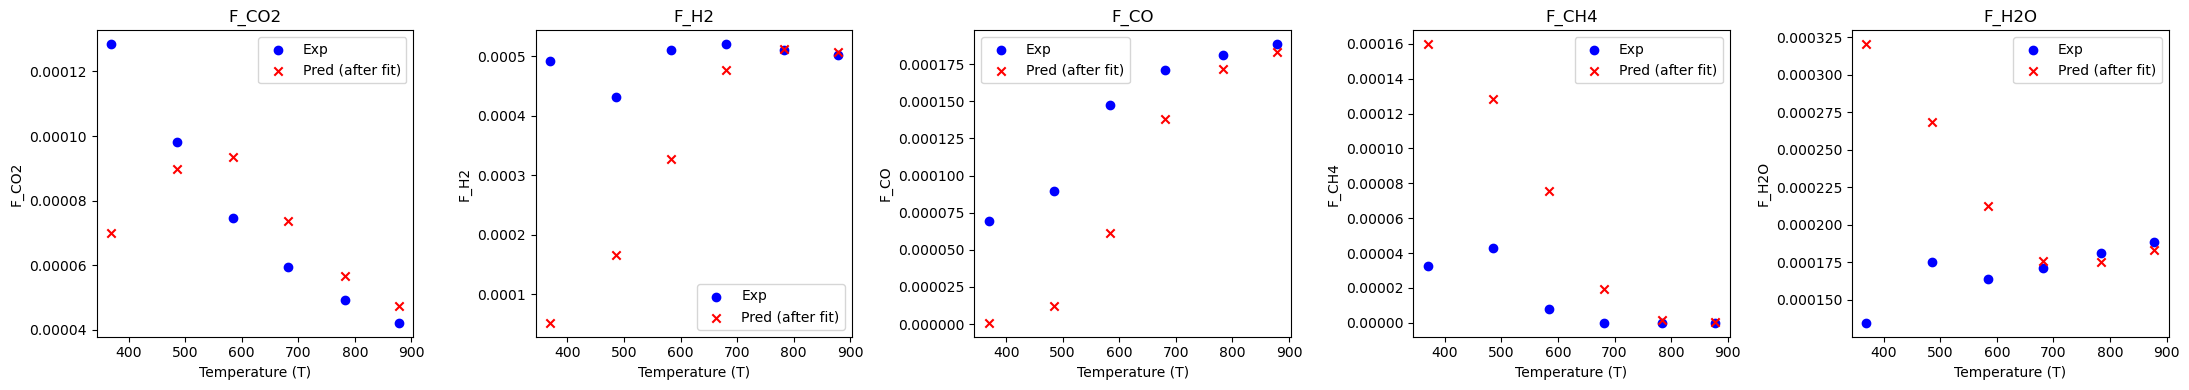

In [181]:
import matplotlib.pyplot as plt

species = ['F_CO2', 'F_H2', 'F_CO', 'F_CH4', 'F_H2O']

comparison_rows = []
for idx, case in df_1.iterrows():
    N_pred_after = solve_ode(10**best_x*k0, case)[:,-1] 
    N_exp = case[species].values
    row = {
        'case_idx': idx,
        'T': case['T']
    }
    for i, s in enumerate(species):
        row[f'{s}_pred_after'] = N_pred_after[i]
        row[f'{s}_exp'] = N_exp[i]
        row[f'{s}_diff_after'] = N_pred_after[i] - N_exp[i]
    comparison_rows.append(row)
    
comparison_df = pd.DataFrame(comparison_rows)


fig, axs = plt.subplots(1, len(species), figsize=(22, 4))
for i, s in enumerate(species):
    ax = axs[i]
    # 실험값
    ax.scatter(comparison_df['T'], comparison_df[f'{s}_exp'], label='Exp', marker='o', color='b')
    ax.scatter(comparison_df['T'], comparison_df[f'{s}_pred_after'], label='Pred (after fit)', marker='x', color='r')
    ax.set_xlabel('Temperature (T)')
    ax.set_ylabel(s)
    ax.set_title(s)
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
10**best_x*k0

array([1.92809079e+06, 3.01573448e+04, 4.89422046e+07, 3.71578881e+06,
       9.51544131e+01, 9.88851803e+01, 8.94446775e+01, 1.03938621e+02,
       2.36701484e-03, 6.11982006e-01, 1.07953184e+00, 5.16296111e-05,
       6.61814145e-04, 4.27143502e+01, 1.40630507e+01, 9.72425514e+00,
       5.32182064e+01, 3.87883405e+01])

In [ ]:
best_x


array([ 0.00637388,  0.00712435,  0.00394179, -0.00010259, -0.06296375,
        0.00791198, -0.00763004,  0.02866411, -0.00419692,  0.00212136,
        0.00385168, -0.00310449, -0.0020856 ,  0.02204777, -0.01328846,
        0.00019008,  0.01005689,  0.00572927])

In [ ]:
para = 10**best_x*k0

In [ ]:
import json
import numpy as np

# para가 numpy array인 경우 리스트로 변환
para_list = para.tolist() if isinstance(para, np.ndarray) else para

with open('para_Ni12Ce2_KeqDRM.json', 'w') as f:
    json.dump({'para': para_list}, f)
